**Instructor**: Prof. Keith Chugg (chugg@usc.edu)

**Teaching Assistant**: Alexios Rustom (arustom@usc.edu)

**Notebooks**: Written by Alexios Rustom (arustom@usc.edu)

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

In [2]:
def plot_mnist_samples(images, labels):
    plt.figure(figsize=(10, 4))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap="gray")
        plt.title(f"Label: {labels[i]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

In [3]:
def plot_predictions(images, true_labels, predicted_labels):
    plt.figure(figsize=(10, 4))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap="gray")
        plt.title(f"Pred: {predicted_labels[i]}\nTrue: {true_labels[i]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

In [4]:
x_data, y_data = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

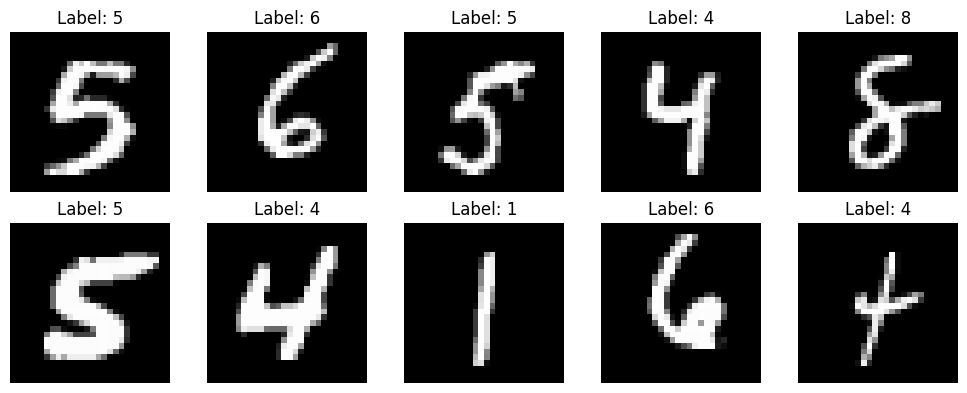

In [5]:
indices = np.random.choice(len(x_data), 10, replace=False)
plot_mnist_samples(x_data[indices], y_data[indices])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## One vs. Rest Classification

In [ ]:
clf_logistic_ovr = OneVsRestClassifier(LogisticRegression(C=0.1, penalty="l1", solver="saga", tol=0.01))
clf_logistic_ovr.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=0.1, penalty='l1',
                                                 solver='saga', tol=0.01))

In [17]:
train_acc_ovr = clf_logistic_ovr.score(X_train, y_train)
test_acc_ovr = clf_logistic_ovr.score(X_test, y_test)
print(f"OvR Training Accuracy: {train_acc_ovr:.4f}")
print(f"OvR Test Accuracy: {test_acc_ovr:.4f}")

OvR Training Accuracy: 0.8921
OvR Test Accuracy: 0.8853


In [18]:
y_pred = clf_logistic_ovr.predict(X_test)

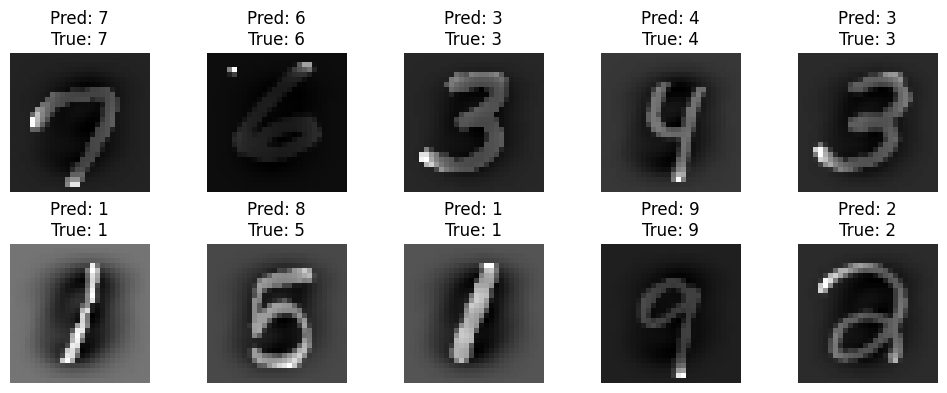

In [19]:
indices = np.random.choice(len(X_test), 10, replace=False)
plot_predictions(X_test[indices], y_test[indices], y_pred[indices])

## Multi-class Classification

In [12]:
clf_logistic_multi_class = LogisticRegression(solver='saga', penalty="l1", C=0.1, tol=0.01)
clf_logistic_multi_class.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='saga', tol=0.01)

In [13]:
train_acc_multi_class = clf_logistic_multi_class.score(X_train, y_train)
test_acc_multi_class = clf_logistic_multi_class.score(X_test, y_test)
print(f"Multi-class Training Accuracy: {train_acc_multi_class:.4f}")
print(f"Multi-class Test Accuracy: {test_acc_multi_class:.4f}")

Multi-class Training Accuracy: 0.9166
Multi-class Test Accuracy: 0.9075


In [14]:
y_pred = clf_logistic_multi_class.predict(X_test)

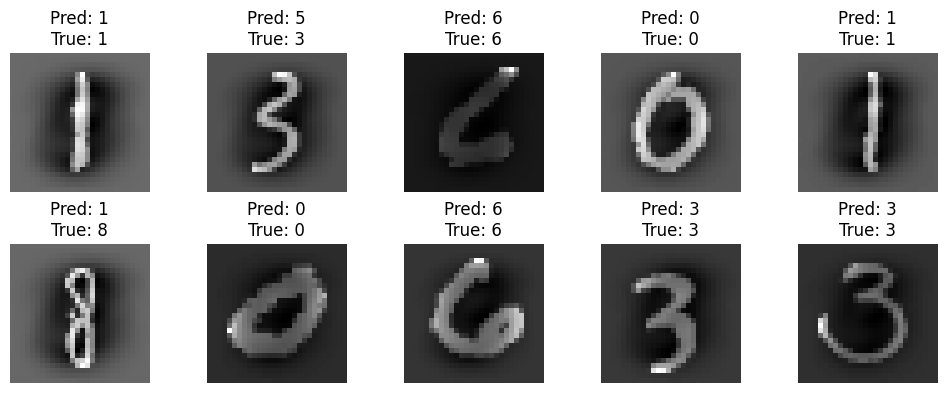

In [15]:
indices = np.random.choice(len(X_test), 10, replace=False)
plot_predictions(X_test[indices], y_test[indices], y_pred[indices])